<a href="https://colab.research.google.com/github/RaulMirabal28/ChallengeTelecomX_Parte2/blob/main/ChallengeTelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd

In [163]:
df = pd.read_csv('/content/datos_tratados.csv')

In [164]:
df.head()

,IDCliente,Cancelacion,Genero,MayorDeEdad,Pareja,Dependientes,MesesContratado,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,TransmisionTelevision,TransmisionPeliculas,TipoContrato,FacturacionElectronica,MetodosPago,CargoMensual,CargoTotal,CostoDiario
0,0002-ORFBO,False,Mujer,0,True,True,9,True,False,DSL,...,False,True,True,False,Un año,True,Cheque C.,65.6,593.30,2.186667
1,0003-MKNFE,False,Hombre,0,False,False,9,True,True,DSL,...,False,False,False,True,Mes a mes,False,Cheque C.,59.9,542.40,1.996667
2,0004-TLHLJ,True,Hombre,0,False,False,4,True,False,Fiber optic,...,True,False,False,False,Mes a mes,True,Cheque E.,73.9,280.85,2.463333
3,0011-IGKFF,True,Hombre,1,True,False,13,True,False,Fiber optic,...,True,False,True,True,Mes a mes,True,Cheque E.,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Mujer,1,True,False,3,True,False,Fiber optic,...,False,True,True,False,Mes a mes,True,Cheque C.,83.9,267.40,2.796667


In [165]:
df.columns

Index(['IDCliente', 'Cancelacion', 'Genero', 'MayorDeEdad', 'Pareja',
       'Dependientes', 'MesesContratado', 'ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'CopiaSeguridadEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'TransmisionTelevision', 'TransmisionPeliculas', 'TipoContrato',
       'FacturacionElectronica', 'MetodosPago', 'CargoMensual', 'CargoTotal',
       'CostoDiario'],
      dtype='object')

In [166]:
#Eliminar columnas irrelevantes

df.drop(columns=['IDCliente'], inplace=True)
df.drop(columns=['CargoTotal', 'CostoDiario'], inplace=True)

In [167]:
df.columns

Index(['Cancelacion', 'Genero', 'MayorDeEdad', 'Pareja', 'Dependientes',
       'MesesContratado', 'ServicioTelefonico', 'MultiplesLineas',
       'ServicioInternet', 'SeguridadEnLinea', 'CopiaSeguridadEnLinea',
       'ProteccionDispositivo', 'SoporteTecnico', 'TransmisionTelevision',
       'TransmisionPeliculas', 'TipoContrato', 'FacturacionElectronica',
       'MetodosPago', 'CargoMensual'],
      dtype='object')

In [168]:
#Columnas Categóricas
df.select_dtypes(include=['object', 'bool']).columns

Index(['Cancelacion', 'Genero', 'Pareja', 'Dependientes', 'ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'CopiaSeguridadEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'TransmisionTelevision', 'TransmisionPeliculas', 'TipoContrato',
       'FacturacionElectronica', 'MetodosPago'],
      dtype='object')

In [169]:
#One-hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [170]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cancelacion                   7043 non-null   bool   
 1   MayorDeEdad                   7043 non-null   int64  
 2   Pareja                        7043 non-null   bool   
 3   Dependientes                  7043 non-null   bool   
 4   MesesContratado               7043 non-null   int64  
 5   ServicioTelefonico            7043 non-null   bool   
 6   MultiplesLineas               7043 non-null   bool   
 7   SeguridadEnLinea              7043 non-null   bool   
 8   CopiaSeguridadEnLinea         7043 non-null   bool   
 9   ProteccionDispositivo         7043 non-null   bool   
 10  SoporteTecnico                7043 non-null   bool   
 11  TransmisionTelevision         7043 non-null   bool   
 12  TransmisionPeliculas          7043 non-null   bool   
 13  Fac

In [171]:
#Proporción de cancelación
print(df_encoded['Cancelacion'].value_counts())

Cancelacion
False    5174
True     1869
Name: count, dtype: int64


In [172]:
print(df_encoded['Cancelacion'].value_counts(normalize=True))

Cancelacion
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [173]:
#Balanceo
from imblearn.over_sampling import SMOTE

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X = df_encoded.drop(columns=['Cancelacion'])
y = df_encoded['Cancelacion']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [177]:
smote = SMOTE(random_state=42)

In [178]:
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [179]:
print(y_train_bal.value_counts())

Cancelacion
False    4139
True     4139
Name: count, dtype: int64


In [180]:
#Normalización de columnas numéricas

from sklearn.preprocessing import StandardScaler

In [181]:
X_train_norm = X_train_bal.copy()
X_test_norm = X_test.copy()

scaler = StandardScaler()
cols_to_scale = ['MesesContratado', 'CargoMensual']

X_train_norm[cols_to_scale] = scaler.fit_transform(X_train_norm[cols_to_scale])
X_test_norm[cols_to_scale] = scaler.transform(X_test_norm[cols_to_scale])

In [182]:
#Análisis de Correlación

df_corr = df_encoded.copy()
df_corr = df_corr.astype(int)

In [183]:
correlation_matrix = df_corr.corr()

correlaciones = correlation_matrix['Cancelacion'].sort_values(ascending=False)

In [184]:
print("Variables más correlacionadas positivamente con Cancelación:")
print(correlaciones.head(10))

Variables más correlacionadas positivamente con Cancelación:
Cancelacion                     1.000000
TipoContrato_Mes a mes          0.405103
ServicioInternet_Fiber optic    0.308020
MetodosPago_Cheque E.           0.301919
CargoMensual                    0.193422
FacturacionElectronica          0.191825
MayorDeEdad                     0.150889
TransmisionTelevision           0.063228
TransmisionPeliculas            0.061382
MultiplesLineas                 0.040102
Name: Cancelacion, dtype: float64


In [185]:
print("Variables más correlacionadas negativamente con Cancelación:")
print(correlaciones.tail(10))

Variables más correlacionadas negativamente con Cancelación:
CopiaSeguridadEnLinea       -0.082255
MetodosPago_Transferencia   -0.117937
MetodosPago_Tarjeta C.      -0.134302
Pareja                      -0.150448
Dependientes                -0.164221
SoporteTecnico              -0.164674
SeguridadEnLinea            -0.171226
TipoContrato_Un año         -0.177820
ServicioInternet_No         -0.227890
MesesContratado             -0.352229
Name: Cancelacion, dtype: float64


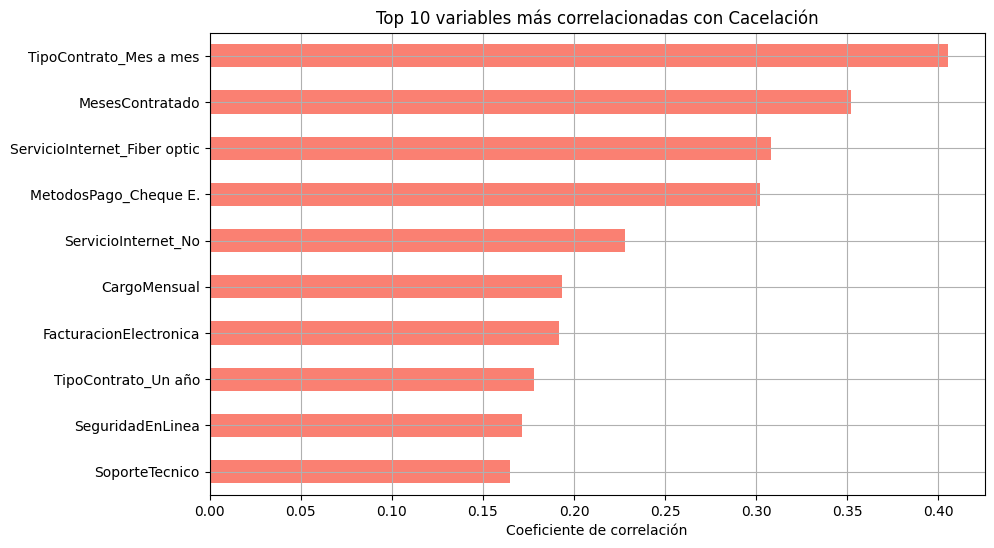

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

correlaciones_filtradas = correlaciones.drop('Cancelacion')

top_vars = correlaciones_filtradas.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_vars.plot(kind='barh', color='salmon')
plt.title('Top 10 variables más correlacionadas con Cacelación')
plt.xlabel('Coeficiente de correlación')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

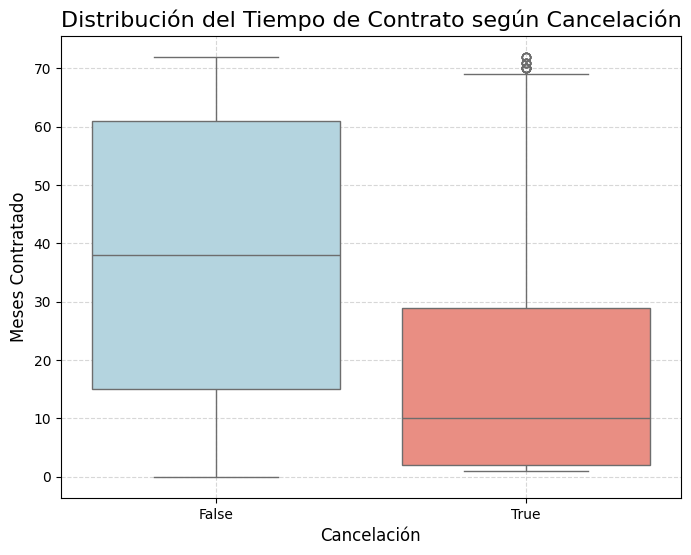

In [211]:
#Análisis Dirigido

#Tiempo de Contrato(MesesContratado) vs Cancelación

plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='MesesContratado', hue='Cancelacion', data=df_encoded, palette={False:'lightblue', True:'salmon'}, legend=False)
plt.title("Distribución del Tiempo de Contrato según Cancelación", fontsize=16)
plt.xlabel("Cancelación", fontsize=12)
plt.ylabel("Meses Contratado", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [188]:
#CargoTotal vs Cancelación

df_encoded['CargoTotal'] = df_encoded['MesesContratado']*df_encoded['CargoMensual']

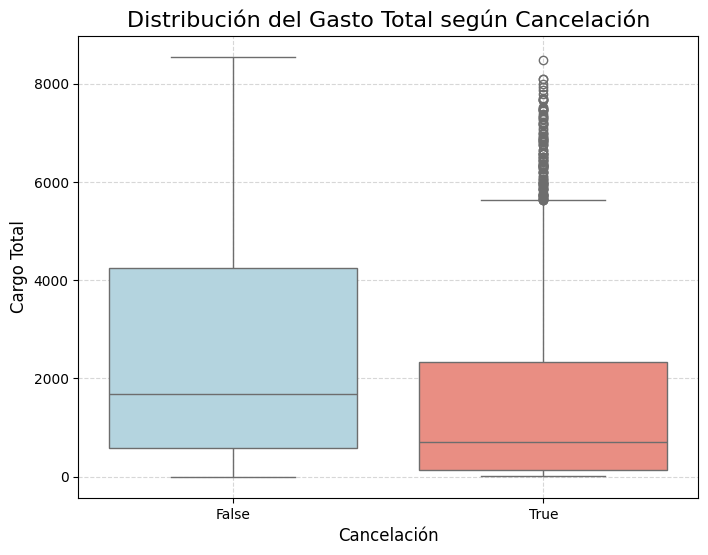

In [209]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cancelacion', y='CargoTotal', hue='Cancelacion',data=df_encoded, palette={False:'lightblue',True:'salmon'}, legend=False)
plt.title("Distribución del Gasto Total según Cancelación", fontsize=16)
plt.xlabel("Cancelación", fontsize=12)
plt.ylabel("Cargo Total", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [190]:
#Modelado Predictivo

In [191]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [192]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [193]:
y_pred_rf = rf_model.predict(X_test)

In [194]:
print("🎯 RANDOM FOREST")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🎯 RANDOM FOREST
[[875 160]
 [157 217]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1035
        True       0.58      0.58      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [195]:
#Regresión Logística

from sklearn.linear_model import LogisticRegression

In [196]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_norm, y_train_bal)

LogisticRegression(max_iter=1000, random_state=42)

In [197]:
y_pred_log = log_model.predict(X_test_norm)

In [198]:
print("📈 REGRESIÓN LOGÍSTICA")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

📈 REGRESIÓN LOGÍSTICA
[[838 197]
 [123 251]]
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1035
        True       0.56      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



  **- ¿Cuál modelo tuvo el mejor desempeño?**

El modelo de Random Forest mostró un mejor desempeño general, con una accuracy de 0.78 y un equilibrio más alto entre precisión y recall en la clase mayoritaria (clientes que no cancelan). Sin embargo, el modelo de Regresión Logística logró un mejor recall (0.67) y mejor f1-score (0.61) en la clase minoritaria (clientes que cancelan), lo cual es relevante si el objetivo es detectar cancelaciones a tiempo.



  **- ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes.**

  Ninguno de los modelos muestra señales claras de overfitting o underfitting. Ambos lograron métricas equilibradas en el conjunto de prueba, sin que haya una caída brusca en rendimiento.

Sin embargo, podría considerarse que:

Random Forest podría beneficiarse de una validación adicional para confirmar que no está sobreajustando a los datos balanceados artificialmente con SMOTE.

Regresión Logística podría estar captando bien las tendencias, pero su menor precisión sugiere que puede cometer falsos positivos (marcar como cancelación cuando no lo es).

In [199]:
#Análisis de la Importancia de las Variables

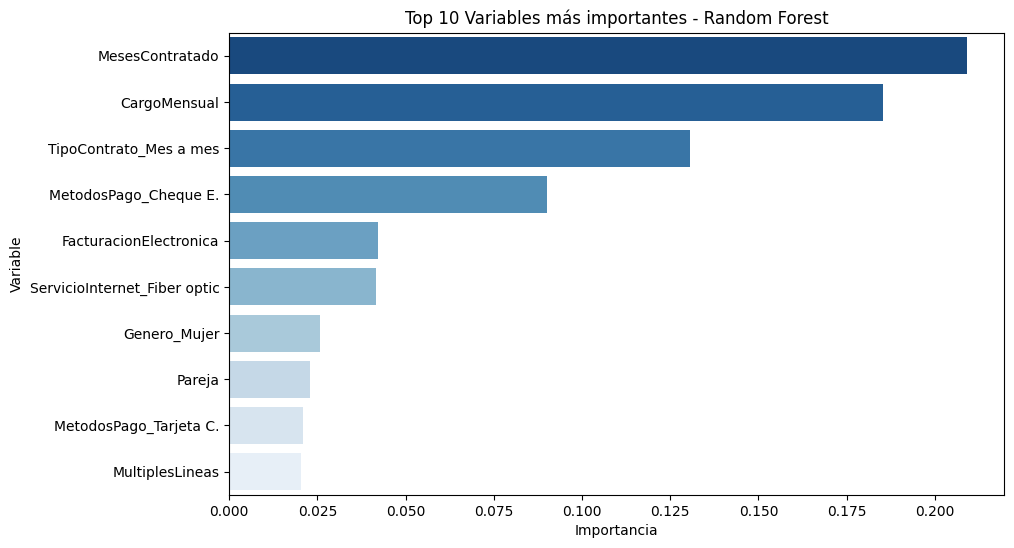

In [204]:
#Random Forest

importances = rf_model.feature_importances_
features = X_train.columns

feature_importances_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", hue="Variable", data=feature_importances_df.head(10), palette='Blues_r')
plt.title("Top 10 Variables más importantes - Random Forest")
plt.show()

In [201]:
#Regresión Logística

coeficientes = log_model.coef_[0]
variables = X_train_norm.columns

coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})
coef_df["Importancia Absoluta"] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia Absoluta', ascending=False)

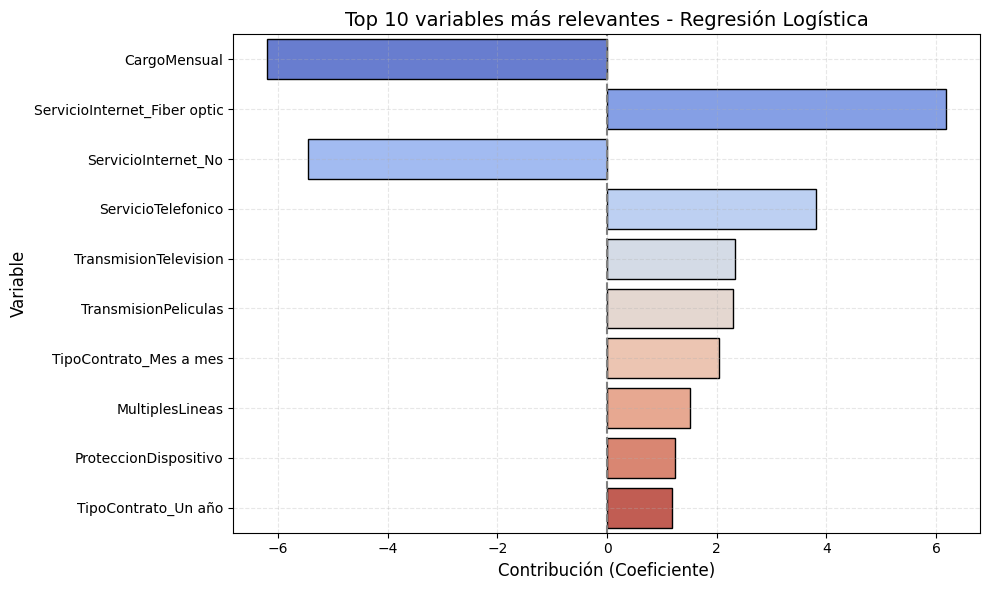

In [206]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Coeficiente',
    y='Variable',
    hue='Variable',
    data=coef_df.head(10),
    palette='coolwarm',
    edgecolor='black',
    legend=False
)
plt.title("Top 10 variables más relevantes - Regresión Logística", fontsize=14)
plt.xlabel("Contribución (Coeficiente)", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#**Conclusión**

Tras realizar el análisis de correlación, modelado predictivo y evaluación de importancia de variables, se identificaron los principales factores asociados a la cancelación de clientes, así como el desempeño de distintos modelos de predicción.

### Factores que más influyen en la cancelación, según los coeficientes de la Regresión Logística, las variables con mayor influencia en la cancelación fueron:

  - Servicio de Internet (Fiber Optic o No): Quienes utilizan fibra óptica mostraron una mayor probabilidad de cancelar, al igual que quienes no poseen servicio de internet. Esto puede reflejar una experiencia de servicio deficiente o falta de percepción de valor.

  - Cargo Mensual: Cuanto más alto es el cargo mensual, menor es la probabilidad de cancelación, lo que sugiere que los clientes con planes más completos o servicios premium tienen mayor lealtad.

  -Tipo de Contrato (Mes a mes): Esta modalidad se asocia con una mayor tasa de cancelación, ya que ofrece menor compromiso.

  - Transmisión de Televisión o Películas: También se observaron como factores relevantes, posiblemente vinculados a la percepción de calidad del servicio multimedia.

### Comparación de modelos

Se entrenaron y evaluaron dos modelos:

  - Random Forest (sin normalización): obtuvo una accuracy del 78%, con buena capacidad para predecir tanto cancelaciones como no cancelaciones.

  - Regresión Logística (con normalización): logró una accuracy del 77%, pero con mejor recall para los casos positivos (cancelaciones), lo que lo hace útil si el objetivo es detectar clientes en riesgo de abandonar el servicio.

Ambos modelos presentaron rendimientos balanceados, sin indicios claros de overfitting o underfitting.

### Estrategias de retención sugeridas

Basados en los factores más influyentes, se proponen las siguientes estrategias:

  - Fomentar contratos a largo plazo, ofreciendo beneficios por migrar de “mes a mes” a contratos anuales.

  - Revisar la experiencia del usuario con fibra óptica, ya que es un punto sensible que está empujando a los clientes a cancelar.

  - Ofrecer paquetes personalizados o descuentos a clientes con cargos bajos, que podrían percibir menor valor en el servicio.

  - Monitorear la satisfacción con los servicios de transmisión, ya que son parte clave de la propuesta de valor.